# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     1088.
Date:                Wed, 22 Oct 2025   Prob (F-statistic):           1.07e-42
Time:                        17:19:14   Log-Likelihood:                 3.5168
No. Observations:                  50   AIC:                            0.9663
Df Residuals:                      46   BIC:                             8.614
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8818      0.080     60.912      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.37764678  4.89433415  5.36667038  5.76320649  6.06384328  6.26313355
  6.37117708  6.41196126  6.41942002  6.4318586   6.48566007  6.60930776
  6.81870544  7.11456447  7.48228685  7.89436368  8.31489476  8.70548692
  9.03156189  9.26803741  9.4034482   9.44182963  9.40205476  9.31473354
  9.21718367  9.14729942  9.13732567  9.20856025  9.36785469  9.60648856
  9.90160221 10.21995257 10.52337483 10.77505289 10.94556808 11.01773259
 10.98941337 10.8738826  10.69763709 10.49604493 10.30753462 10.16728139
 10.10142797 10.12278946 10.2287478  10.40168196 10.61186298 10.82233836
 10.9950033  11.09686114]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[11.09337013 10.93896061 10.65626251 10.29684651  9.92859778  9.61909534
  9.4190663   9.34996616  9.3987257   9.52095082]


## Plot comparison

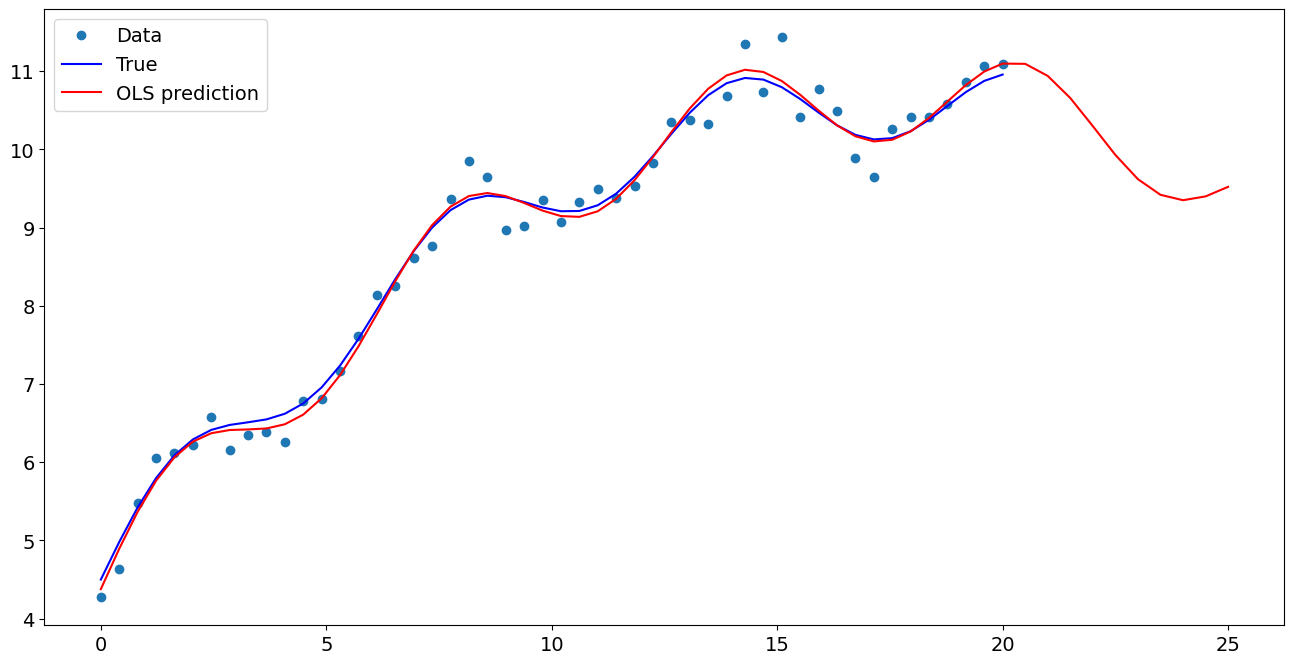

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.881810
x1                  0.511285
np.sin(x1)          0.577055
I((x1 - 5) ** 2)   -0.020167
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    11.093370
1    10.938961
2    10.656263
3    10.296847
4     9.928598
5     9.619095
6     9.419066
7     9.349966
8     9.398726
9     9.520951
dtype: float64